In [36]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.spatial.distance import cdist
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier

#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes,
             normalize=False,
             title='Confusion matrix',
             cmap=plt.cm.Blues):
    #Add Normalization Option
    '''prints pretty confusion metric with normalization option '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

use_pca = False
lda = True
minmaxscaler = True

#Load data
df = pd.read_csv("exoplanet.csv")
df.info()
df = df.replace('CONFIRMED', 0)
df = df.replace('CANDIDATE', 1)
df = df.replace('FALSE POSITIVE', 2)
df = df.fillna(0)

df.sort_values('koi_disposition', inplace=True, ascending=False)
df = df.iloc[2500:]

df = df.sample(frac=1, random_state=42)

df.to_csv("Exoplanet_mod.csv")
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
7703,7704,8624860,K07072.01,0,1,1,0.872,0,0,0,...,-109.0,3.282,0.255,-0.085,4.994,0.631,-1.892,291.79575,44.746181,13.808
5997,5998,2158460,K04932.01,0,2,2,0.000,1,0,0,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,291.06418,37.535751,15.892
4287,4288,10120548,K04451.01,0,1,1,0.851,0,0,0,...,-136.0,4.628,0.035,-0.070,0.706,0.086,-0.058,282.19565,47.105679,15.945
5885,5886,7107561,K03100.01,0,2,2,0.000,0,1,1,...,-186.0,4.009,0.259,-0.111,1.877,0.383,-0.575,288.49313,42.692478,13.429
2878,2879,11395587,K00350.01,0,1,1,0.983,0,0,0,...,-116.0,4.402,0.090,-0.110,1.027,0.151,-0.100,287.86142,49.264462,13.387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,1746,8591693,K02123.01,0,1,1,1.000,0,0,0,...,-198.0,4.491,0.052,-0.208,0.949,0.292,-0.097,301.54297,44.605610,14.385
1937,1938,8007644,K02328.01,Kepler-1192 b,0,1,0.407,0,0,0,...,-175.0,4.517,0.048,-0.204,0.921,0.256,-0.092,282.14056,43.896580,15.684
1879,1880,10864531,K02080.01,Kepler-358 c,0,1,0.526,0,0,0,...,-193.0,4.505,0.052,-0.208,0.940,0.297,-0.099,293.23022,48.281368,15.375
267,268,8414716,K00910.01,Kepler-721 b,0,1,1.000,0,0,0,...,-155.0,4.589,0.024,-0.102,0.801,0.106,-0.057,284.43051,44.480530,15.651


In [37]:
#normalize feature with MinMaxScaler after it we need to fit the data
MinMaxScaler = preprocessing.MinMaxScaler()

y_data = pd.read_csv('Exoplanet_mod.csv', usecols= ['koi_disposition'])
x_data = pd.read_csv('Exoplanet_mod.csv', usecols= ['koi_fpflag_nt','koi_fpflag_ss','koi_fpflag_co',
                                                    'koi_fpflag_ec','koi_period','koi_period_err1','koi_period_err2',
                                                    'koi_time0bk','koi_time0bk_err1','koi_time0bk_err2','koi_impact',
                                                    'koi_impact_err1','koi_impact_err2','koi_duration','koi_duration_err1',
                                                    'koi_duration_err2','koi_depth','koi_depth_err1','koi_depth_err2','koi_prad',
                                                    'koi_prad_err1','koi_prad_err2','koi_teq','koi_teq_err1','koi_teq_err2',
                                                    'koi_insol','koi_insol_err1','koi_insol_err2','koi_model_snr','koi_tce_plnt_num',
                                                    'koi_steff','koi_steff_err1','koi_steff_err2','koi_slogg','koi_slogg_err1',
                                                    'koi_slogg_err2','koi_srad','koi_srad_err1','koi_srad_err2','ra','dec','koi_kepmag'])

#take the 80% of data for train and 20% for test
x_train = x_data[:5651]#7650
y_train = y_data[:5651]

x_test = x_data[5651:]
y_test = y_data[5651:]

x_train = x_train.values
x_test = x_test.values

print("Classes train : ", y_train.shape)
print("Features train : ", x_train.shape)

print("Classes test :", y_test.shape)
print("Features train : ", x_test.shape)
if minmaxscaler:
    x_train = MinMaxScaler.fit_transform(x_train)
    x_test = MinMaxScaler.fit_transform(x_test)


Classes train :  (5651, 1)
Features train :  (5651, 42)
Classes test : (1413, 1)
Features train :  (1413, 42)


In [38]:
from sklearn.decomposition import PCA
if use_pca : 
    # Calculate the mean of each feature and center the data
    m = np.mean(x_train, axis=0)
    Xc = x_train - m

    m1 = np.mean(x_test, axis=0)
    Xc_t = x_test - m1

    # Calculate the covariance matrix of the centred data
    C = np.cov(Xc, rowvar=False)
    C1 = np.cov(Xc_t, rowvar=False)

    # Calculate eigenvalues and eigenvectors of the covariance matrix
    lambdas, U = np.linalg.eigh(C)
    lambdas1, U1 = np.linalg.eigh(C1)

    # Order the eigenvalues from largest to smallest

    best_eig_idxs = np.argsort(lambdas)[::-1]
    best_eig = lambdas[best_eig_idxs]
    best_U = U[:, best_eig_idxs]

    best_eig_idxs1 = np.argsort(lambdas1)[::-1]
    best_eig1 = lambdas1[best_eig_idxs1]
    best_U1 = U1[:, best_eig_idxs1]

    # I construct the transformation matrix T: 
    T = best_U[:, :4]
    T1 = best_U1[:, :4]

    # Apply the transformation to the train data, make a scatter plot of the transformed data
    # The transformation is performed via the inner product of the transformation matrix T
    # and the (centered) data matrix
    x_train = np.dot(Xc, T)
    x_test = np.dot(Xc_t, T1)



In [39]:
#Calculate LDA with SKLEARN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
if lda :
    lda = LinearDiscriminantAnalysis(n_components=2)
    lda.fit(x_train, y_train)
    x_train = lda.transform(x_train)
    x_test = lda.transform(x_test)

d:\program file\python\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


################# euclidean [K=7]  #################
              precision    recall  f1-score   support

           0       0.70      0.71      0.70       472
           1       0.70      0.63      0.67       471
           2       0.91      0.98      0.94       470

    accuracy                           0.77      1413
   macro avg       0.77      0.77      0.77      1413
weighted avg       0.77      0.77      0.77      1413

Euclidean\\


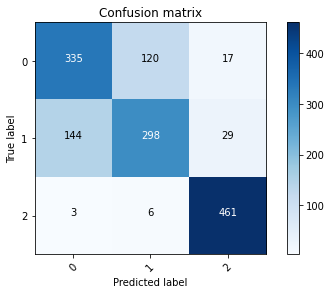

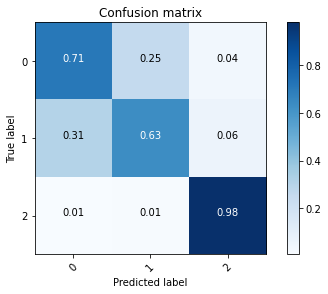

################# euclidean [K=9]  #################
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       472
           1       0.71      0.64      0.67       471
           2       0.91      0.99      0.95       470

    accuracy                           0.78      1413
   macro avg       0.78      0.78      0.78      1413
weighted avg       0.78      0.78      0.78      1413

Euclidean\\


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


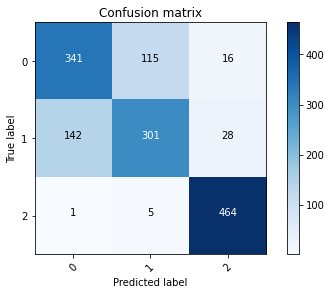

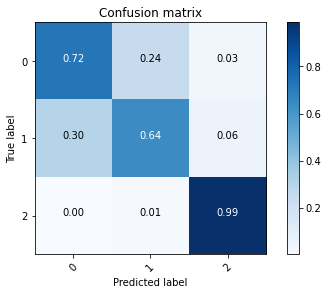

################# euclidean [K=11]  #################
              precision    recall  f1-score   support

           0       0.70      0.73      0.72       472
           1       0.72      0.63      0.67       471
           2       0.92      0.99      0.95       470

    accuracy                           0.78      1413
   macro avg       0.78      0.78      0.78      1413
weighted avg       0.78      0.78      0.78      1413

Euclidean\\


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


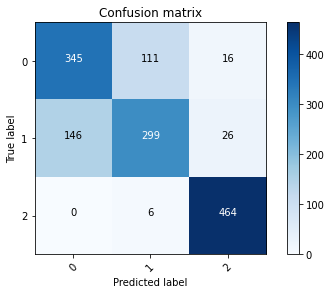

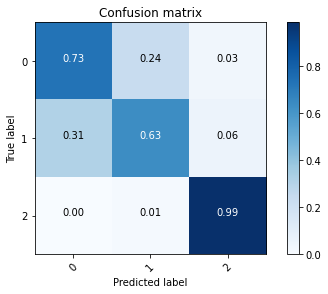

################# euclidean [K=13]  #################
              precision    recall  f1-score   support

           0       0.71      0.76      0.73       472
           1       0.74      0.63      0.68       471
           2       0.91      0.99      0.95       470

    accuracy                           0.79      1413
   macro avg       0.79      0.79      0.79      1413
weighted avg       0.79      0.79      0.79      1413

Euclidean\\


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


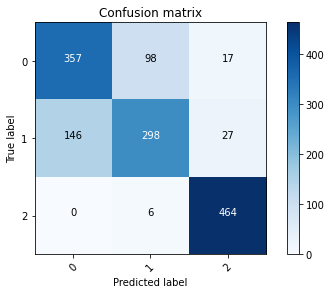

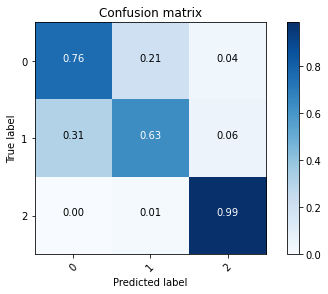

################# euclidean [K=15]  #################
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       472
           1       0.74      0.63      0.68       471
           2       0.91      0.99      0.95       470

    accuracy                           0.79      1413
   macro avg       0.78      0.79      0.79      1413
weighted avg       0.78      0.79      0.78      1413

Euclidean\\


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


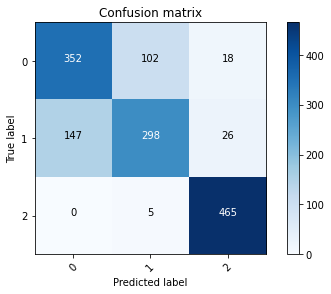

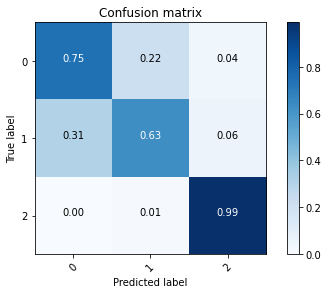

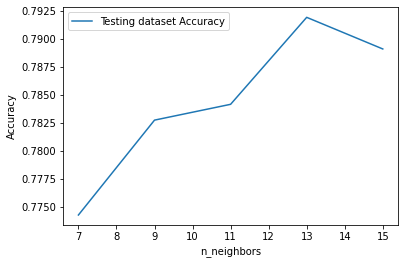

################# manhattan [K=7]  #################
              precision    recall  f1-score   support

           0       0.71      0.72      0.71       472
           1       0.72      0.65      0.68       471
           2       0.91      0.98      0.94       470

    accuracy                           0.78      1413
   macro avg       0.78      0.78      0.78      1413
weighted avg       0.78      0.78      0.78      1413

Manhattan\\


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


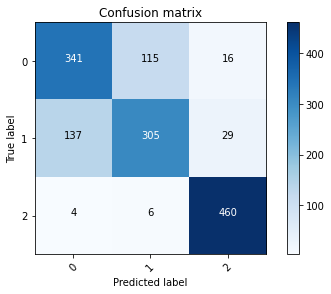

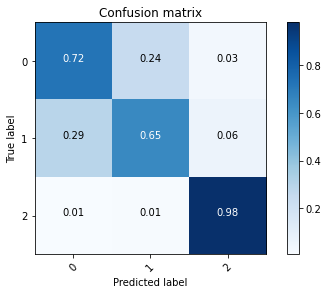

################# manhattan [K=9]  #################
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       472
           1       0.73      0.65      0.69       471
           2       0.92      0.99      0.95       470

    accuracy                           0.79      1413
   macro avg       0.79      0.79      0.79      1413
weighted avg       0.79      0.79      0.79      1413

Manhattan\\


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


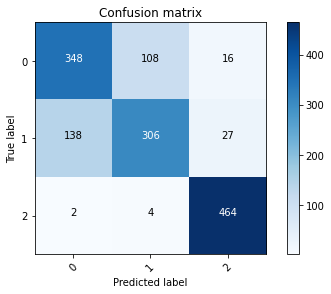

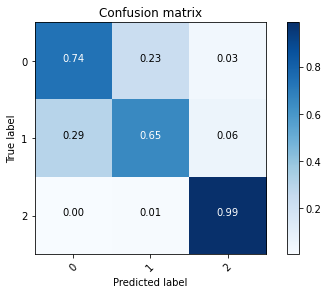

################# manhattan [K=11]  #################
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       472
           1       0.73      0.64      0.68       471
           2       0.91      0.99      0.95       470

    accuracy                           0.79      1413
   macro avg       0.78      0.79      0.78      1413
weighted avg       0.78      0.79      0.78      1413

Manhattan\\


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


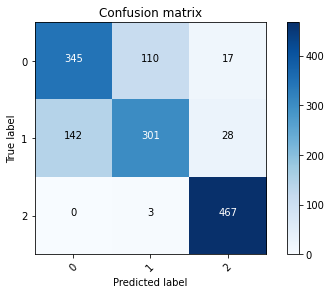

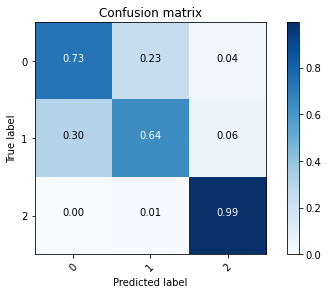

################# manhattan [K=13]  #################
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       472
           1       0.74      0.63      0.68       471
           2       0.91      0.99      0.95       470

    accuracy                           0.79      1413
   macro avg       0.79      0.79      0.79      1413
weighted avg       0.79      0.79      0.79      1413

Manhattan\\


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


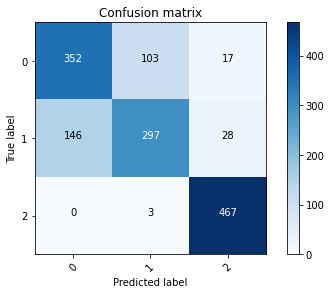

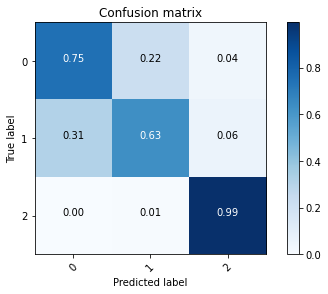

################# manhattan [K=15]  #################
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       472
           1       0.74      0.63      0.68       471
           2       0.91      0.99      0.95       470

    accuracy                           0.79      1413
   macro avg       0.79      0.79      0.79      1413
weighted avg       0.79      0.79      0.79      1413

Manhattan\\


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


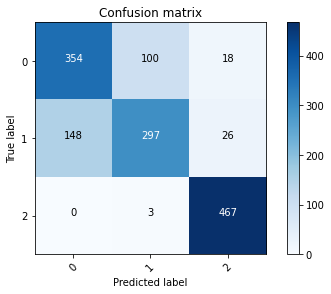

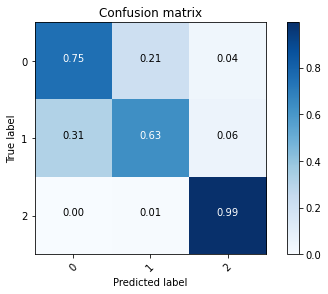

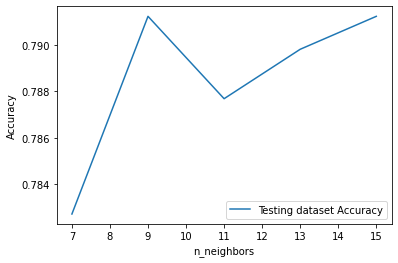

################# chebyshev [K=7]  #################
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       472
           1       0.71      0.64      0.67       471
           2       0.91      0.98      0.94       470

    accuracy                           0.78      1413
   macro avg       0.77      0.78      0.77      1413
weighted avg       0.77      0.78      0.77      1413

Chebyshev\\


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


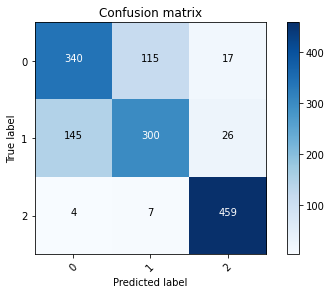

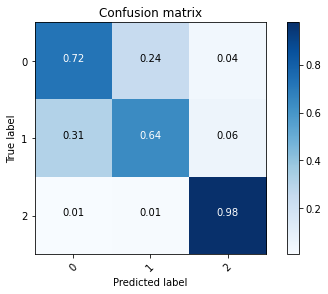

################# chebyshev [K=9]  #################
              precision    recall  f1-score   support

           0       0.70      0.73      0.72       472
           1       0.72      0.64      0.68       471
           2       0.92      0.99      0.95       470

    accuracy                           0.79      1413
   macro avg       0.78      0.79      0.78      1413
weighted avg       0.78      0.79      0.78      1413

Chebyshev\\


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


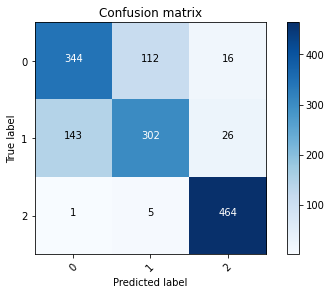

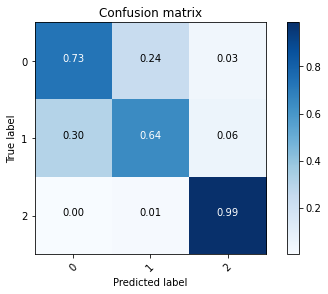

################# chebyshev [K=11]  #################
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       472
           1       0.73      0.65      0.68       471
           2       0.92      0.99      0.95       470

    accuracy                           0.79      1413
   macro avg       0.79      0.79      0.79      1413
weighted avg       0.79      0.79      0.79      1413

Chebyshev\\


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


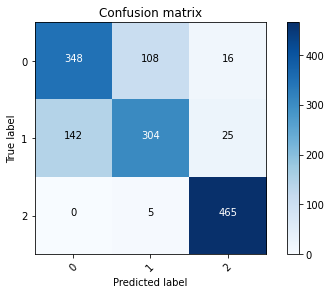

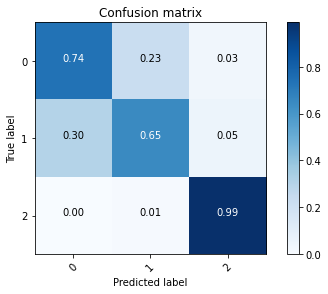

################# chebyshev [K=13]  #################
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       472
           1       0.73      0.64      0.68       471
           2       0.92      0.99      0.95       470

    accuracy                           0.79      1413
   macro avg       0.78      0.79      0.78      1413
weighted avg       0.78      0.79      0.78      1413

Chebyshev\\


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


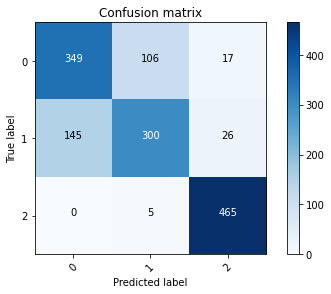

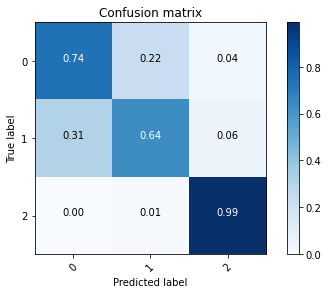

################# chebyshev [K=15]  #################
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       472
           1       0.73      0.63      0.68       471
           2       0.91      0.99      0.95       470

    accuracy                           0.79      1413
   macro avg       0.78      0.79      0.78      1413
weighted avg       0.78      0.79      0.78      1413

Chebyshev\\


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


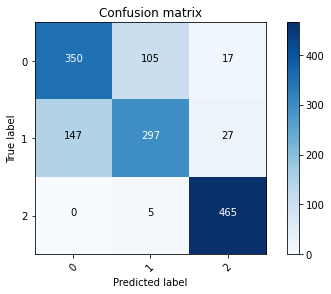

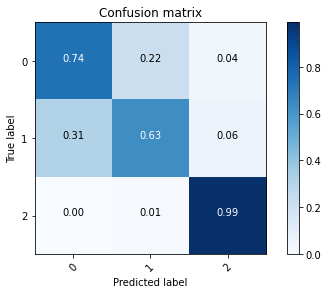

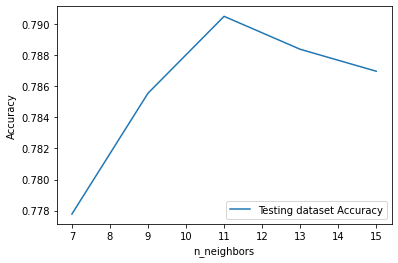

################# minkowski [K=7]  #################
              precision    recall  f1-score   support

           0       0.69      0.72      0.70       472
           1       0.71      0.63      0.67       471
           2       0.91      0.98      0.95       470

    accuracy                           0.77      1413
   macro avg       0.77      0.78      0.77      1413
weighted avg       0.77      0.77      0.77      1413

Minkowski\\


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


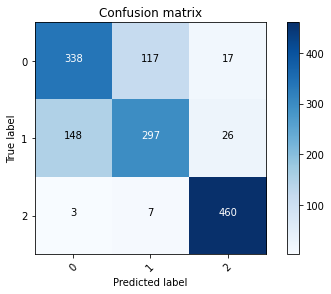

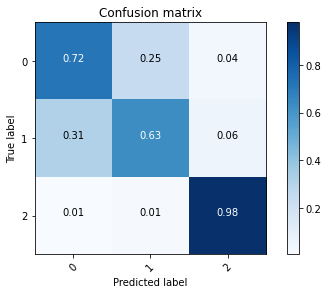

################# minkowski [K=9]  #################
              precision    recall  f1-score   support

           0       0.70      0.73      0.72       472
           1       0.72      0.64      0.68       471
           2       0.92      0.99      0.95       470

    accuracy                           0.78      1413
   macro avg       0.78      0.79      0.78      1413
weighted avg       0.78      0.78      0.78      1413

Minkowski\\


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


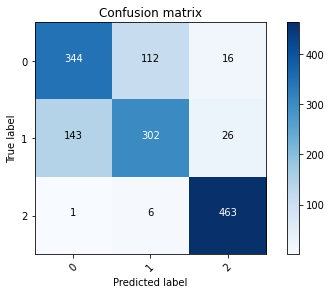

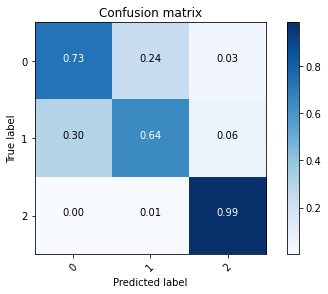

################# minkowski [K=11]  #################
              precision    recall  f1-score   support

           0       0.71      0.74      0.73       472
           1       0.73      0.65      0.69       471
           2       0.92      0.99      0.95       470

    accuracy                           0.79      1413
   macro avg       0.79      0.79      0.79      1413
weighted avg       0.79      0.79      0.79      1413

Minkowski\\


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


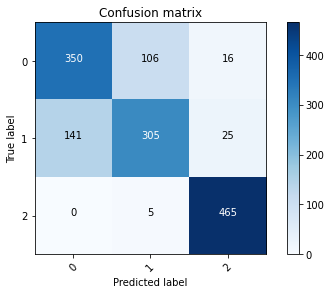

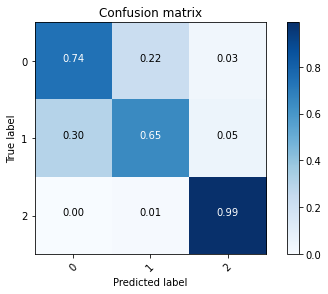

################# minkowski [K=13]  #################
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       472
           1       0.73      0.64      0.68       471
           2       0.92      0.99      0.95       470

    accuracy                           0.79      1413
   macro avg       0.79      0.79      0.79      1413
weighted avg       0.79      0.79      0.79      1413

Minkowski\\


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


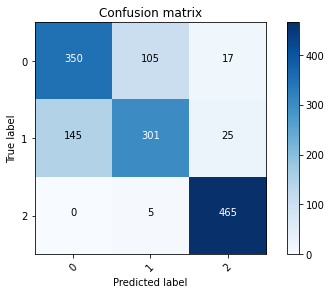

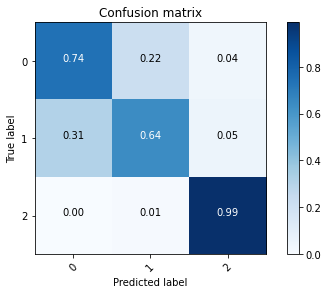

################# minkowski [K=15]  #################
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       472
           1       0.73      0.63      0.68       471
           2       0.91      0.99      0.95       470

    accuracy                           0.79      1413
   macro avg       0.78      0.79      0.78      1413
weighted avg       0.78      0.79      0.78      1413

Minkowski\\


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


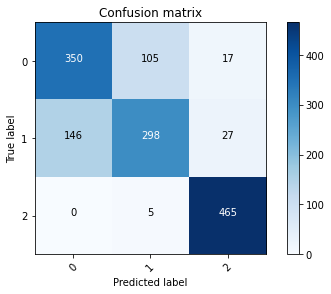

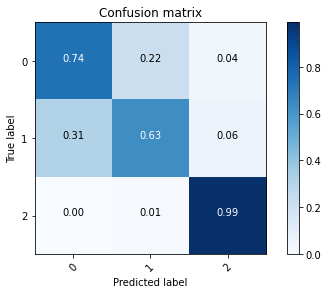

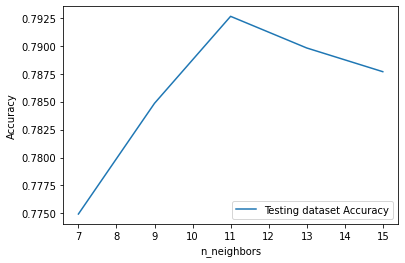

In [40]:
from sklearn.metrics import accuracy_score
ks = [7,9,11,13,15]
funs = ["euclidean", "manhattan","chebyshev","minkowski"]#,"seuclidean","mahalanobis"]

classes = ['0','1','2']

train_accuracy = np.empty(len(ks))
test_accuracy = np.empty(len(ks))
train_scores, test_scores = list(), list()

#iterate over different functions
for fun in funs:
    i=0
    for k in ks:
        if fun=="minkowski":
            knn_clf=KNeighborsClassifier(n_neighbors=k, weights='distance', metric=fun, p=8)
        elif fun == "manhattan":
            knn_clf=KNeighborsClassifier(n_neighbors=k, weights='distance', metric=fun, p=1)
        else:
            knn_clf=KNeighborsClassifier(n_neighbors=k, weights='distance', metric=fun)
        
        print("#################", fun ,"[K=%i]  #################" % k)
        knn_clf.fit(x_train,y_train)
        predict=knn_clf.predict(x_test)

        #print classification report
        classification_metrics = metrics.classification_report(y_test, np.round(predict), target_names=classes)
        cm_dict = metrics.classification_report(y_test, np.round(predict), target_names=classes, output_dict=True)
        print(classification_metrics)
        print(fun[0].capitalize()+fun[1:]+"\\\\")

        confusion_matrix= metrics.confusion_matrix(y_test, predict)

        # plot confusion matrix
        plot_confusion_matrix(confusion_matrix, classes)
        plt.show()
        plot_confusion_matrix(confusion_matrix, classes, normalize=True)
        plt.show()

        #storing accuracy for each k 
        test_accuracy[i] = knn_clf.score(x_test, y_test)
        i = i+1

    # graph to show accuracy 
    plt.plot(ks, test_accuracy, label = 'Testing dataset Accuracy')
    
    plt.legend()
    plt.xlabel('n_neighbors')
    plt.ylabel('Accuracy')
    plt.show()
